# On The Economic of Law Enforcement : Harm Repairing and Deterrence Mechanisms
In the context of illegal activity resulting in damage to victims, it is appropriate first to repair the harm and then to apply punishment. However, it is impossible to proceed with the compensation of damages if the perpetrator of the prejudicial act is not detected. Thereafter, the legal procedure of applying the punishment succeeds the compensation of damage. This article aims at combining the civil procedure of compensation (tort procedure) and the criminal procedure (legal procedure) of enforcement of the law.

In order to achieve our goal of repairing damages while deterring illegal activities, we use the following assumptions :

- Repair harm is impossible without preceding detection
- Punishment cannot be applied without detection
- Conviction is a detection-dependent event
- We release of the assumption that probability of detection and probability of conviction are the same
- The compensation of the damage can be total if detection is certain

We note by\
$b$ : the monetary benefit\
$h$ : harm\
$s$ : fine\
$p$ : probability of arrest\
$q$ : probability of conviction

A priori, we have the intuition that 

$$b = q (h +s)$$
if we set $S = h +s$, such that 
$\bar{S}= h +\bar{s}$ and $\underline{S} = h +\underline{s}$
if the offender is rich, we apply $\bar{S}$, and if the offender is poor, we use $\underline{S}$

The expected utility of the offender is written

$$ EU_{p,q} = (1-p)(1-q)b + (b-h)p(1-q) + q(b-h-s)$$

After simplifying,

$$ EU_{p,q} = b - qs + h(p(1-q) +q)$$

Note that $b-qs$ is the expected benefit and $h(p(1-p)+q)$ the expected damage.

## Proposition 1
If detection is uncertain, conviction is also uncertain because, since the two events are dependent, the offender anticipates a monetary benefit b
## Proof 1
As $p =0$, $q$ must necessarily be equal to zero because the two events are dependent
$E_{0,0} = b$


## Proposition 2
If the arrest is certain, the harm is repaired and whatever the value of the probability of conviction, we obtain the canonial form of the Becker $b-qs$ deterrence model
## Proof 2
If $p=1$, for any $q$, $EU_{1,q}=b-qs+h((1-q)+q)$, so $E_{1,q} = b-qs$

This means that conviction depends on detection. Law enforcer can only punish if the offender is arrested. So to satisfy the condition of deterrence and damage compensation and before applying the punishment, it is necessary that $p=1$. In other words, it is necessary that the arrest be certain so that the damage is compensated for in order to subsequently apply the punishment.

## Proposition 3
If the detection is at the optimum, the damage is eliminated by acting on $p$, we obtain $h = 0$.
## Proof 3
By acting on $p$, $\frac{\partial E}{\partial p}=0$  $h((1-q)+q)=0$ $\Longrightarrow h=0$.



# The model

# Application and optimum calculation with python 

In [1]:
from sympy import *
from IPython.core.interactiveshell import InteractiveShell #print all elements, not only last one
InteractiveShell.ast_node_interactivity = "all"
init_printing(use_unicode=True)
%matplotlib inline

# Definition of the functions and the variables

In [2]:
p, q, b, s, h, B, H, b0, h0, b1, h1 = symbols('p, q, b, s, h, bbar, hbar, b0, h0, b1, h1') # Other accents can also be used like 'hat', 'check', 'tilde', 'acute', 'grave', 'dot', 'ddot', 'breve', 'bar', and 'vec'
EU = symbols('EU', cls=Function)(p, q, b, s, h) # expected utility for the offender
f = symbols ('f', cls = Function)(b) # density function of b
g = symbols ('g', cls = Function)(h) # density function of h
C = symbols ('C', cls = Function)(p,q) # cost of apprehension and conviction

EU
f
g

In [3]:
EU = (1-p)*(1-q)*b + (b-h)*p*(1-q) + q*(b-h-s)
expect = simplify(EU)

Eq(factor(factor(expect, p,q),h),0)

EUp = Eq(EU.diff(p),0) 
solve(EUp)
EU0p = EU.subs(p,0) # monetary benefit if arrest is uncertain and conviction is uncertain too
EU0q = EU0p.subs(q,0)
EU0q

EU1p = EU.subs(p,1) # monetary benefit with certainity of arrest p = 1
solve(EU1p)

EU1q = EU1p.subs(q,0) # monetary benefit if the offender is poor q = 0
solve(EU1q) # solution of poor offender

EU2q = EU1p.subs(q,1) # monetary benefit if the offender is rich q = 1
solve(EU2q) # solution of rich offender


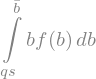

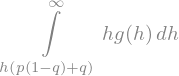

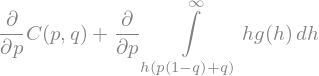

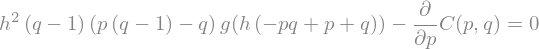

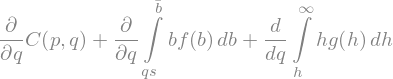

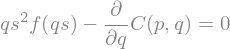

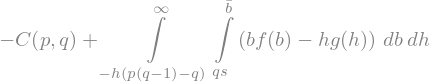

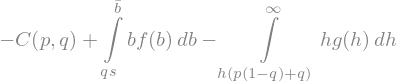

In [4]:
b0 = q*s
b1 = B
h_low = h*(p*(1-q)+q) 

F = integrate(b*f,(b, b0, b1)) # benefit function f
G = integrate(h*g,(h, h_low,oo)) # harm function
F
G
Derivative(G,p) + Derivative(C,p)
simplify(Eq(G.diff(p) + C.diff(p),0))


Derivative(F,q) + Derivative(G.subs(p,1),q) + Derivative(C,q) # respecting the condition p = 1, i.e. certainty of the arrest) before application of the sanction
simplify(Eq(F.diff(q) + G.subs(p,1).diff(q) + C.diff(q),0))



funct = b*f - h*g # definition of welfare

welf = integrate(integrate((funct),(b,b0, b1)),(h,(h_low, oo)))- C
welf1 = F - G - C
simplify(welf)
welf1


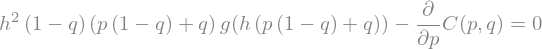

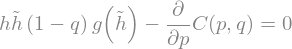

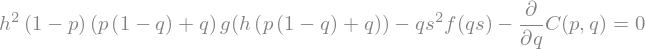

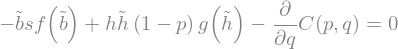

In [5]:
c_p = C.diff(p) # marginal cost of arrestation
c_q = C.diff(q) # marginal cost of punishment

derive_p = Eq(welf1.diff(p),0) # derivative wit respect to p
derive_p

sol1 = derive_p.subs(h*(p*(1-q)+q),'htilde') 
sol1
derive_q = Eq(welf1.diff(q),0) # derivative with respect to q, knowing that the arrest is certain
derive_q

sol2 = derive_q.subs({(h*(p*(1-q)+q)):'htilde', (q*s): 'btilde'})
sol2

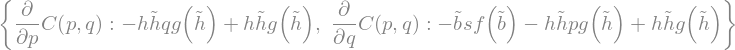

In [6]:
solution = solve([factor(sol1), factor(sol2)], [c_p, c_q])
solution

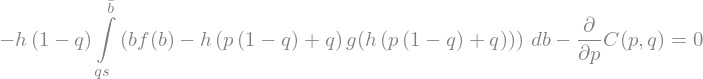

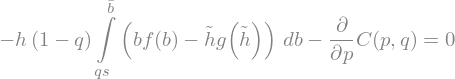

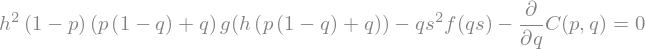

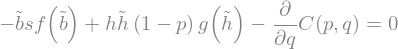

In [7]:
derive_p = Eq(welf.diff(p),0)
derive_p

solwelf1 = derive_p.subs(h*(p*(1-q)+q),'htilde') 
solwelf1

derive_q = Eq(welf1.diff(q),0)
derive_q

solwelf2 = derive_q.subs({(h*(p*(1-q)+q)):'htilde', (q*s): 'btilde'})
solwelf2

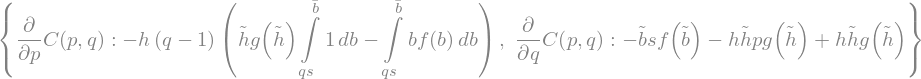

In [8]:
c_p = C.diff(p) # marginal cost of arrestation
c_q = C.diff(q) # marginal cost of punishment

solution = solve([solwelf1, solwelf2], [c_p, c_q])
factor(solution)